## Testing if the data follows a Laplace distribution

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import laplace, kstest
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [14]:
ticker = "^GSPC"
data = yf.download(ticker, start="2015-01-01", end="2024-06-01", auto_adjust=True)
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [20]:
# Fit Laplace distribution and carry out a Kolmogorov-Smirnov test
loc, scale = laplace.fit(log_returns)
loc = float(loc)
scale = float(scale)

D, p_value = kstest(log_returns, 'laplace', args=(loc, scale))

print(f"Laplace fit parameters: loc = {loc:.5f}, scale = {scale:.5f}")
print(f"Kolmogorov-Smirnov test for Laplace:")
#print(f"  D-statistic = {D:.4f}, p-value = {p_value:.4f}")
print(f"D-statistic = {D.item():.4f}, p-value = {p_value.item():.4f}")
print("  =>", "Fits Laplace" if p_value > 0.05 else "Does NOT fit Laplace")

Laplace fit parameters: loc = 0.00060, scale = 0.00739
Kolmogorov-Smirnov test for Laplace:
D-statistic = 0.0257, p-value = 0.0855
  => Fits Laplace


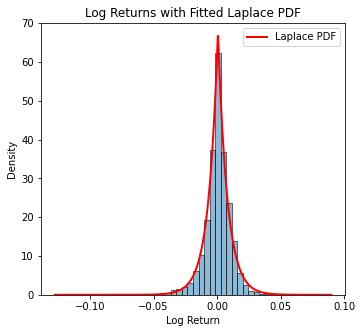

In [18]:
# Plot histogram with Laplace PDF
x = np.linspace(log_returns.min(), log_returns.max(), 1000)
pdf_laplace = laplace.pdf(x, loc=loc, scale=scale)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(log_returns, bins=50, kde=False, stat="density", color='lightgray')
plt.plot(x, pdf_laplace, 'r', lw=2, label='Laplace PDF')
plt.title('Log Returns with Fitted Laplace PDF')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.show()

<Figure size 432x432 with 0 Axes>

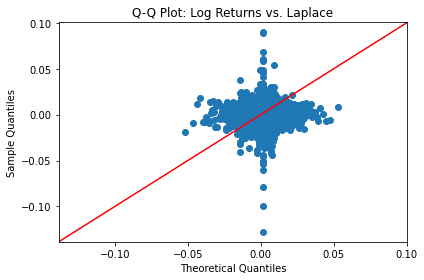

In [17]:
plt.figure(figsize=(6, 6))
frozen_laplace = laplace(loc=loc, scale=scale)
sm.qqplot(log_returns, dist=frozen_laplace, line='45')
plt.title('Q-Q Plot: Log Returns vs. Laplace')
plt.tight_layout()
plt.show()